## Analisis de Ventas

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ventas = pd.read_csv('ventas.csv', sep=';')

In [4]:
ventas.head()

,Mes,Ventas
0,01-jan-2017,266.0
1,01-feb-2017,145.9
2,01-mar-2017,183.1
3,01-apr-2017,119.3
4,01-may-2017,180.3


In [5]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mes     36 non-null     object 
 1   Ventas  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


In [6]:
ventas['Mes'] = pd.to_datetime(ventas['Mes'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_11860\549502315.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ventas['Mes'] = pd.to_datetime(ventas['Mes'])


In [7]:
ventas.head()

,Mes,Ventas
0,2017-01-01,266.0
1,2017-02-01,145.9
2,2017-03-01,183.1
3,2017-04-01,119.3
4,2017-05-01,180.3


In [8]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Mes     36 non-null     datetime64[ns]
 1   Ventas  36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 708.0 bytes


In [9]:
import seaborn as sns

In [10]:
sns.__version__

'0.13.0'

<Axes: xlabel='Mes', ylabel='Ventas'>

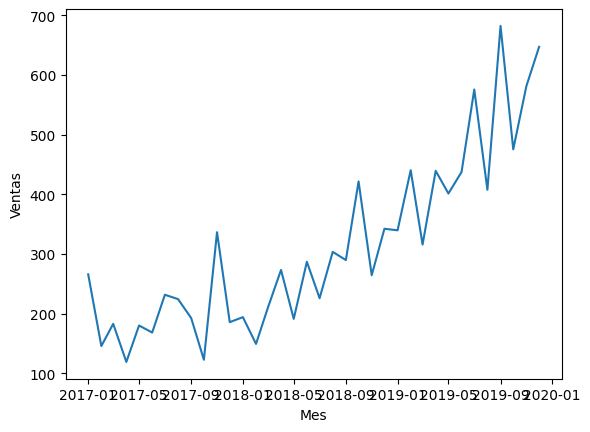

In [11]:
sns.lineplot(x='Mes', y='Ventas', data=ventas)

In [12]:
def grafico(titulo, x, y, xlabel, ylabel):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=ventas)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax = ax

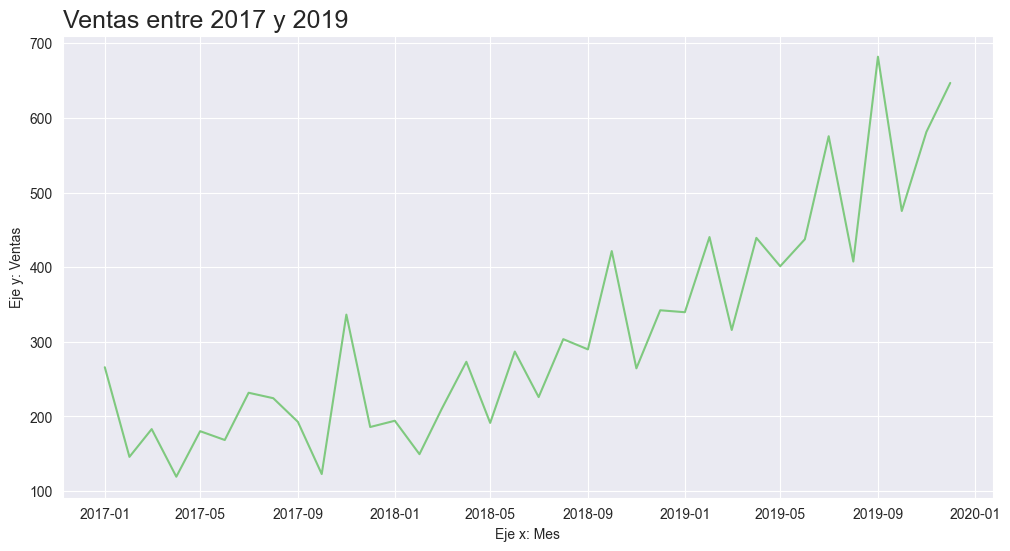

In [13]:
grafico('Ventas entre 2017 y 2019', 'Mes', 'Ventas', 'Eje x: Mes', 'Eje y: Ventas')

## Descomposición de series temporales

In [14]:
ventas.head()

,Mes,Ventas
0,2017-01-01,266.0
1,2017-02-01,145.9
2,2017-03-01,183.1
3,2017-04-01,119.3
4,2017-05-01,180.3


In [15]:
ventas['Variacion'] = ventas['Ventas'].diff()
ventas.head()

,Mes,Ventas,Variacion
0,2017-01-01,266.0,NaN
1,2017-02-01,145.9,-120.1
2,2017-03-01,183.1,37.2
3,2017-04-01,119.3,-63.8
4,2017-05-01,180.3,61.0


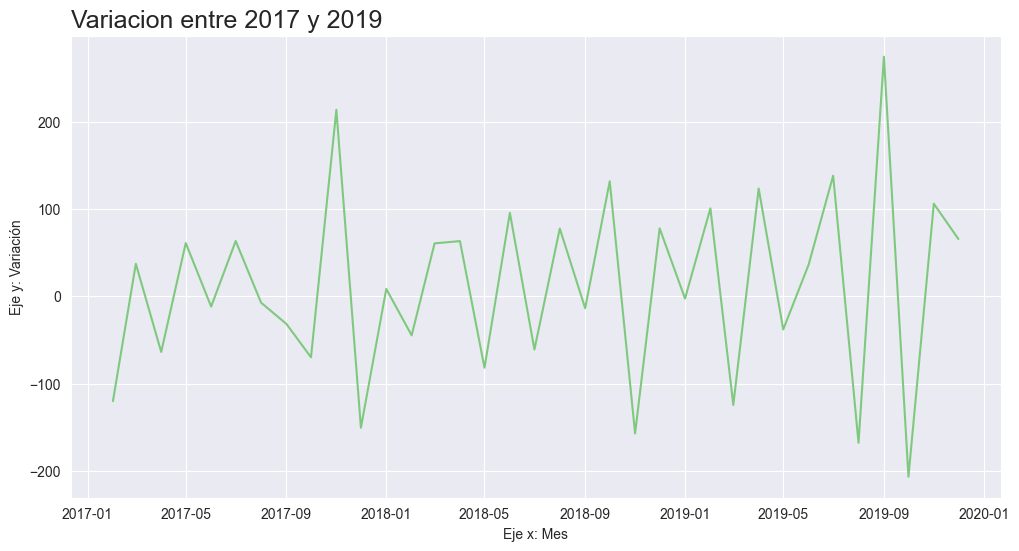

In [16]:
grafico('Variacion entre 2017 y 2019', 'Mes', 'Variacion', 'Eje x: Mes', 'Eje y: Variación')

In [17]:
ventas['Aceleracion'] = ventas['Variacion'].diff()
ventas.head()

,Mes,Ventas,Variacion,Aceleracion
0,2017-01-01,266.0,NaN,NaN
1,2017-02-01,145.9,-120.1,NaN
2,2017-03-01,183.1,37.2,157.3
3,2017-04-01,119.3,-63.8,-101.0
4,2017-05-01,180.3,61.0,124.8


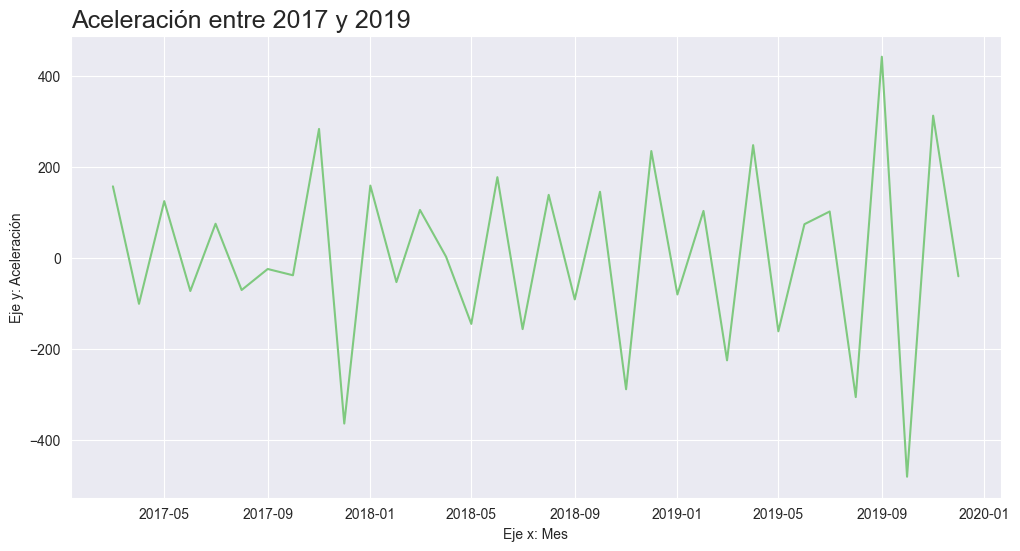

In [18]:
grafico('Aceleración entre 2017 y 2019', 'Mes', 'Aceleracion', 'Eje x: Mes', 'Eje y: Aceleración')

In [19]:
import matplotlib.pyplot as plt

In [20]:
def comparacion_grafico(titulo, dataset, x, y1, y2, y3):
    plt.figure(figsize=(16,11))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, loc='left', fontsize=18)
    sns.lineplot(x=x, y= y1, data= dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y= y2, data= dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y= y3, data= dataset)
    ax = ax

In [21]:
ventas.head()

,Mes,Ventas,Variacion,Aceleracion
0,2017-01-01,266.0,NaN,NaN
1,2017-02-01,145.9,-120.1,NaN
2,2017-03-01,183.1,37.2,157.3
3,2017-04-01,119.3,-63.8,-101.0
4,2017-05-01,180.3,61.0,124.8


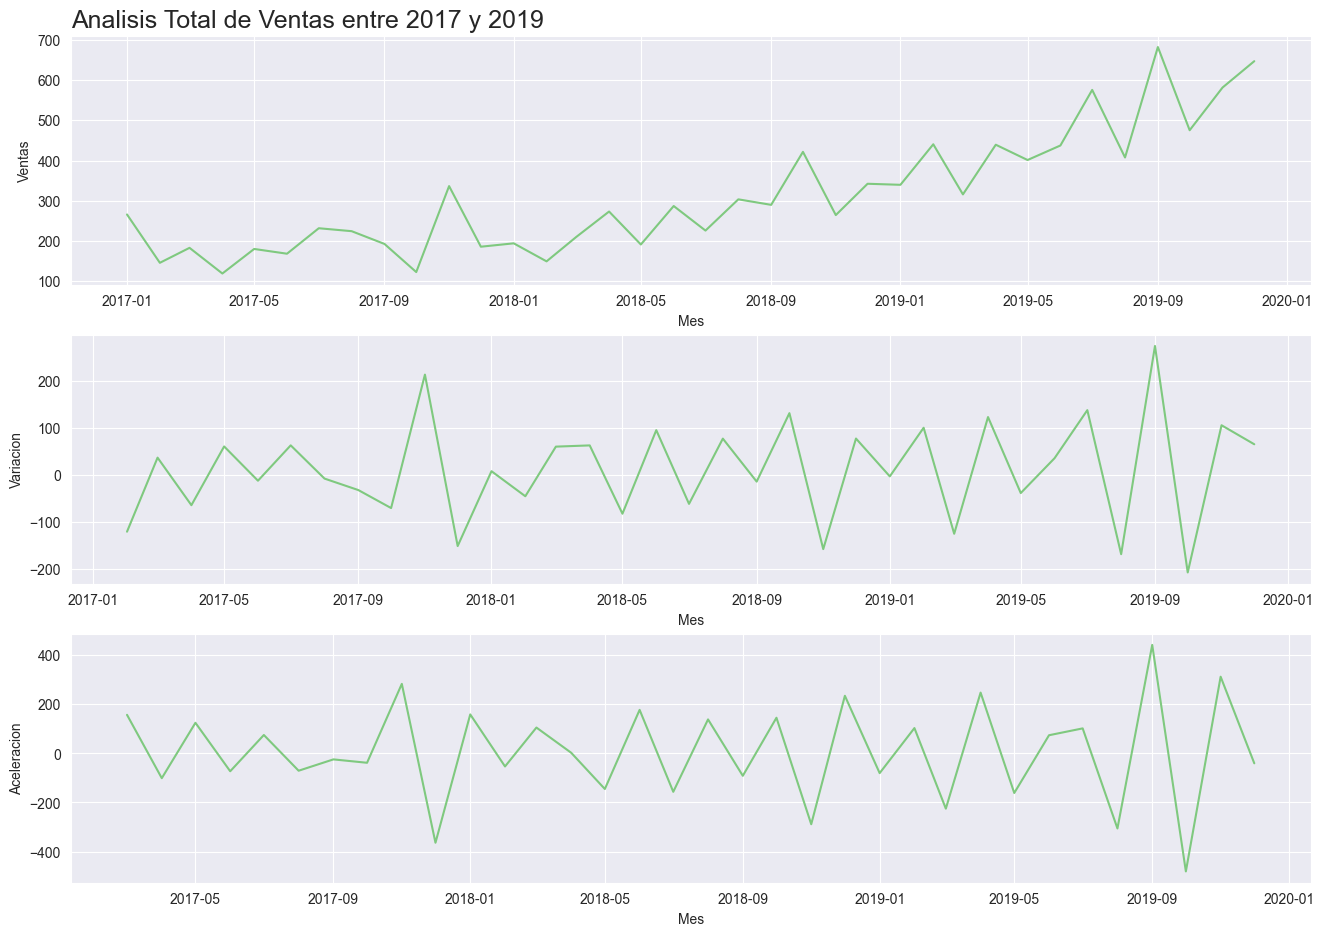

In [22]:
comparacion_grafico('Analisis Total de Ventas entre 2017 y 2019', ventas, 'Mes', 'Ventas', 'Variacion', 'Aceleracion')

## Autocorrelación

In [23]:
from pandas.plotting import autocorrelation_plot

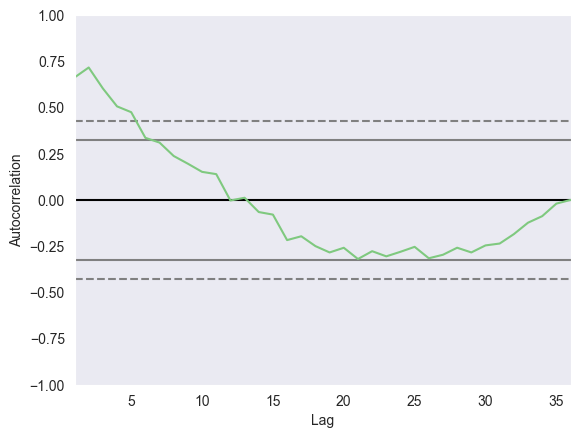

In [24]:
autocorrelation_plot(ventas['Ventas']);

## Grupos

In [25]:
ventas.head()

,Mes,Ventas,Variacion,Aceleracion
0,2017-01-01,266.0,NaN,NaN
1,2017-02-01,145.9,-120.1,NaN
2,2017-03-01,183.1,37.2,157.3
3,2017-04-01,119.3,-63.8,-101.0
4,2017-05-01,180.3,61.0,124.8


In [26]:
agrup_ventas = ventas[['Mes', 'Ventas']].groupby(pd.Grouper(key='Mes', freq='Q')).sum()

In [27]:
agrup_ventas.head()

,Ventas
Mes,
2017-03-31,595.0
2017-06-30,468.1
2017-09-30,649.1
2017-12-31,645.3
2018-03-31,553.9


<Axes: xlabel='Mes', ylabel='Ventas'>

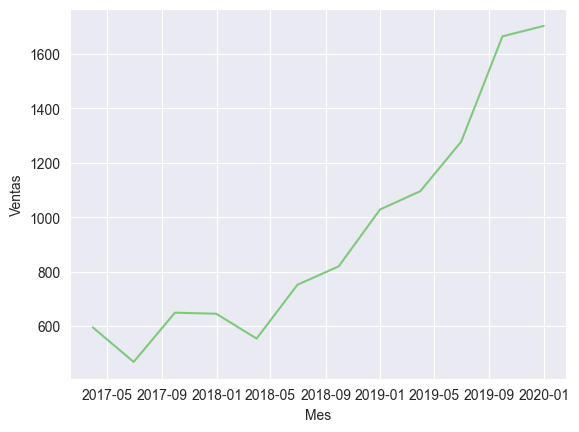

In [28]:
sns.lineplot(x='Mes', y='Ventas', data=agrup_ventas)

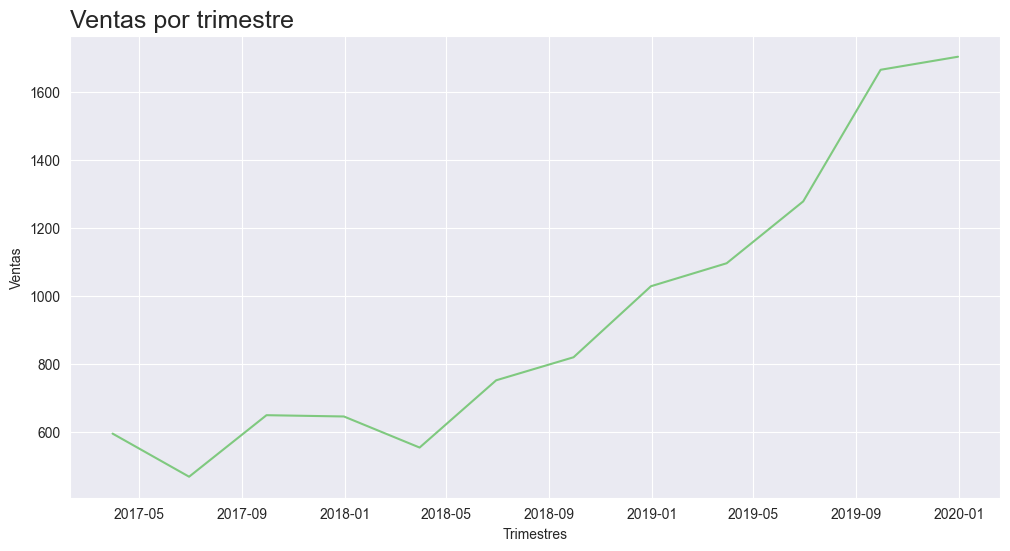

In [29]:
ax = sns.lineplot(x='Mes', y='Ventas', data=agrup_ventas)
ax.figure.set_size_inches(12,6)
ax.set_title('Ventas por trimestre', loc='left', fontsize=18)
ax.set_xlabel('Trimestres')
ax.set_ylabel('Ventas')
ax = ax

## Componente Estacional

In [30]:
df = pd.read_csv('analisis_visitas_playa.csv', sep=';')

In [31]:
df.tail()

,Mes,visitas
187,01-aug-2019,80
188,01-sep-2019,59
189,01-oct-2019,51
190,01/nov/19,49
191,01-dec-2019,52


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Mes      192 non-null    object
 1   visitas  192 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [33]:
df['Mes'] = pd.to_datetime(df['Mes'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_11860\1483561333.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Mes'] = pd.to_datetime(df['Mes'])


In [34]:
df.head()

,Mes,visitas
0,2004-01-01,78
1,2004-02-01,72
2,2004-03-01,76
3,2004-04-01,75
4,2004-05-01,80


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Mes      192 non-null    datetime64[ns]
 1   visitas  192 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [36]:
def grafico2(titulo, x, y, xlabel, ylabel, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(18,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax = ax

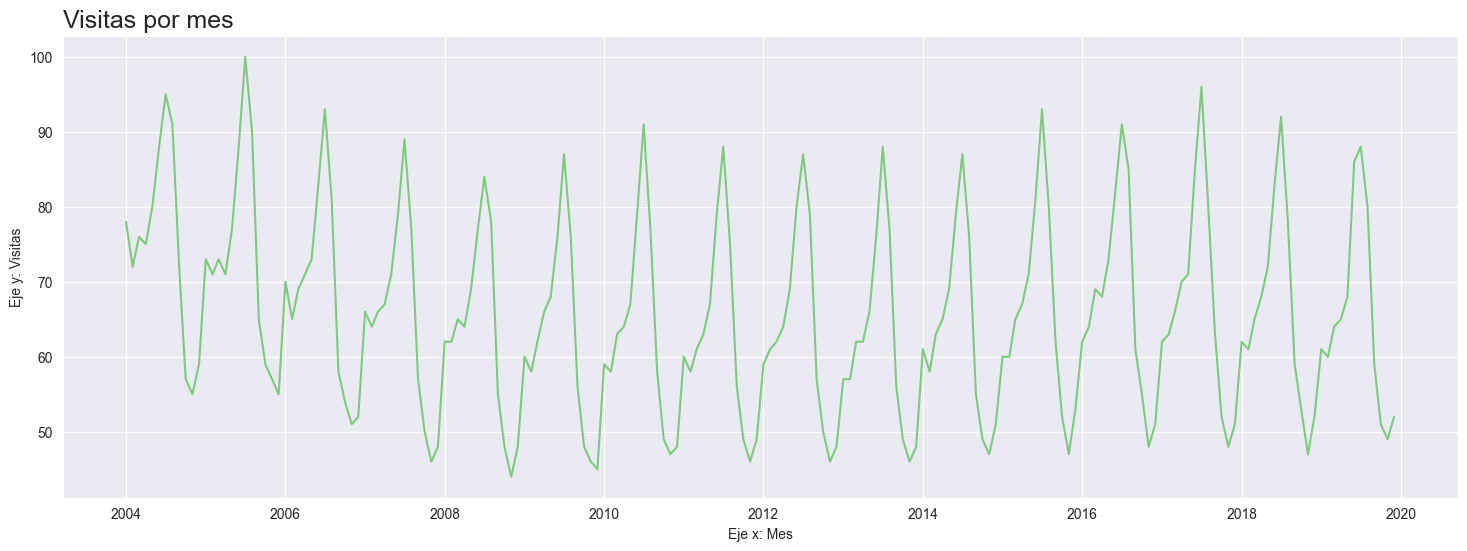

In [37]:
grafico2('Visitas por mes', 'Mes', 'visitas', 'Eje x: Mes', 'Eje y: Visitas', df)

In [38]:
df['Variacion'] = df['visitas'].diff()
df['Aceleración'] = df['Variacion'].diff()

In [39]:
df.head()

,Mes,visitas,Variacion,Aceleración
0,2004-01-01,78,NaN,NaN
1,2004-02-01,72,-6.0,NaN
2,2004-03-01,76,4.0,10.0
3,2004-04-01,75,-1.0,-5.0
4,2004-05-01,80,5.0,6.0


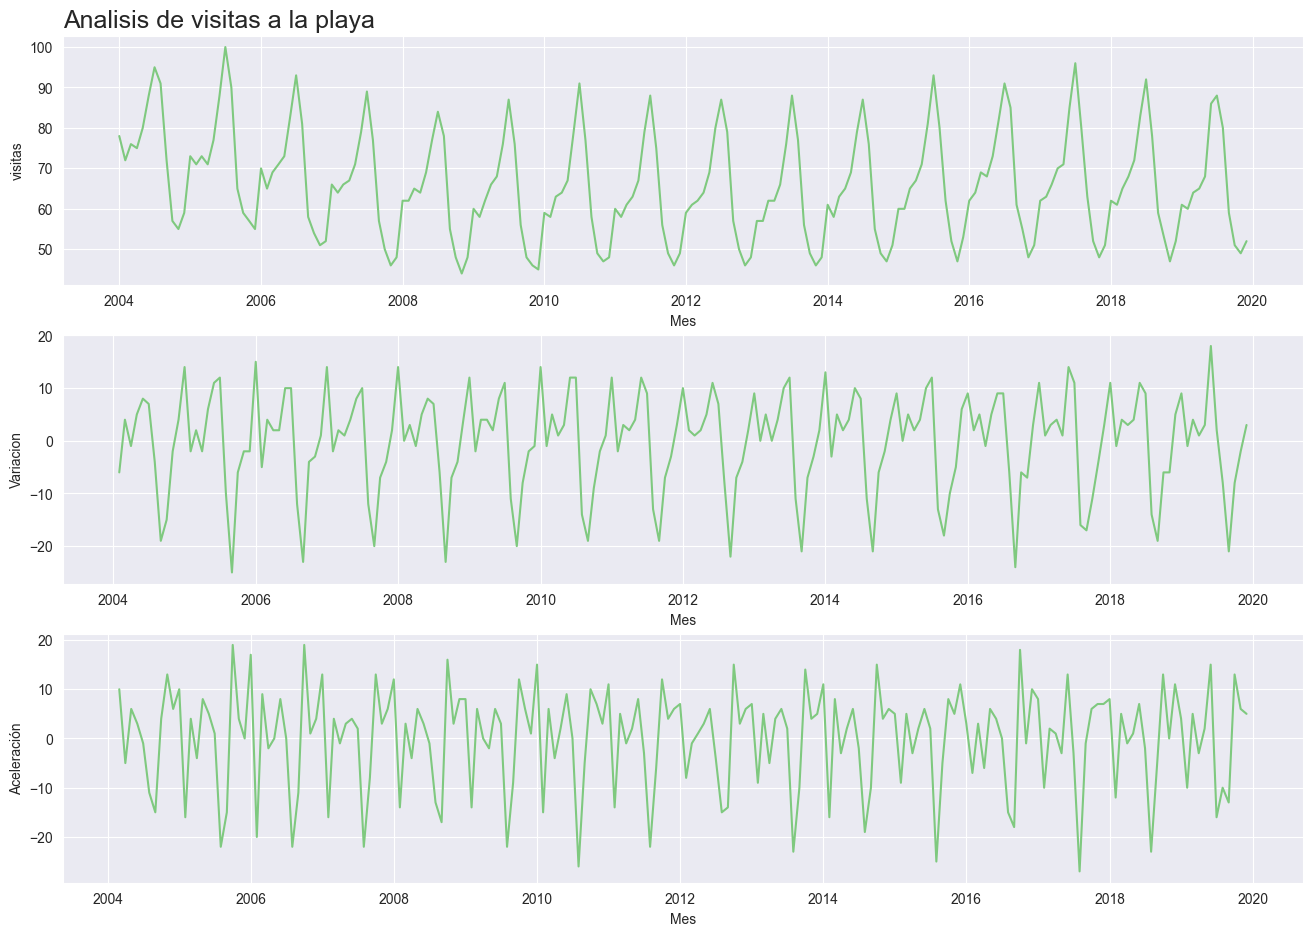

In [40]:
comparacion_grafico('Analisis de visitas a la playa', df, 'Mes', 'visitas', 'Variacion', 'Aceleración')

## Statsmodels

In [48]:
import matplotlib

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose


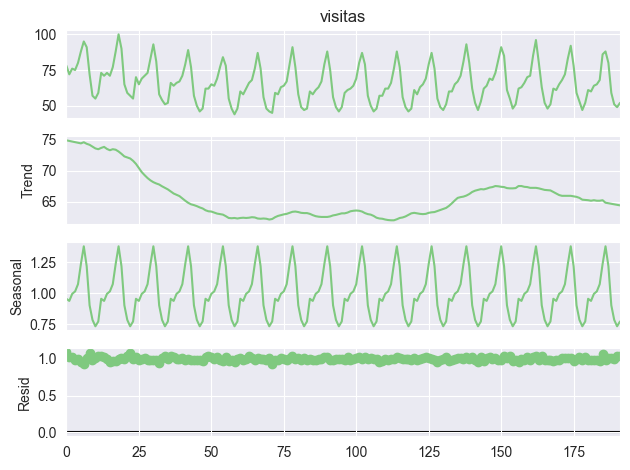

In [52]:

from statsmodels.tsa.seasonal import seasonal_decompose
# Multiplicative Decomposition 
decomp_mul = seasonal_decompose(df['visitas'], model='multiplicative', extrapolate_trend='freq', period=12)
decomp_mul.plot()
plt.show()

In [ ]:
ax = resultado.plot()

In [ ]:
observadas = resultado.observed
tendencia = resultado.trend
estacionalidad = resultado.seasonal
residuo = resultado.resid

In [ ]:
data = ({
    'observadas': observadas
    , 'tendencia': tendencia
    , 'estacionalidad': estacionalidad
    , 'residuo': residuo
})

In [ ]:
df_decompose = pd.DataFrame(data)

In [ ]:
df_decompose.head(12)